In [64]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [65]:
from math import sqrt
SPINE_COLOR = 'gray'

In [90]:
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 12, # fontsize for x and y labels (was 10)
              'axes.titlesize': 12,
              'text.fontsize': 12, # was 10
              'legend.fontsize': 12, # was 10
              'xtick.labelsize': 12,
              'ytick.labelsize': 12,
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    matplotlib.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax


In [67]:
data = {'begin': ['1999-09-21', '1998-08-03', '2002-07-22', '2003-05-27', '2006-07-07', '2007-02-22', '2010-10-14'],
        'end': ['2012-09-12', '2002-07-22', '2003-05-27', '2006-07-07', '2007-02-22', '2010-10-14', '2012-11-05'],
        'name': ['Dataset', 'K.II', 'B.I', 'B.II', 'B.III', 'B.IV', 'R.I'],
        'color': ['blue', 'red', 'red', 'red', 'red', 'red', 'red']}
df = pd.DataFrame(data)
df['begin'] = df.apply(lambda row: pd.to_datetime(row['begin'], format="%Y-%m-%d"), axis=1)
df['end'] = df.apply(lambda row: pd.to_datetime(row['end'], format="%Y-%m-%d"), axis=1)
df

,begin,color,end,name
0,1999-09-21,blue,2012-09-12,Dataset
1,1998-08-03,red,2002-07-22,K.II
2,2002-07-22,red,2003-05-27,B.I
3,2003-05-27,red,2006-07-07,B.II
4,2006-07-07,red,2007-02-22,B.III
5,2007-02-22,red,2010-10-14,B.IV
6,2010-10-14,red,2012-11-05,R.I


In [68]:
df.begin-df.end
start = [(b - pd.to_datetime('1998-01-01', format="%Y-%m-%d")).days for b in df.begin]
end = [(b - pd.to_datetime('1998-01-01', format="%Y-%m-%d")).days for b in df.end]
y = [x+1 for x in df.index]
print df.begin
print start
print end
print list(df.index)

0   1999-09-21
1   1998-08-03
2   2002-07-22
3   2003-05-27
4   2006-07-07
5   2007-02-22
6   2010-10-14
Name: begin, dtype: datetime64[ns]
[628, 214, 1663, 1972, 3109, 3339, 4669]
[5368, 1663, 1972, 3109, 3339, 4669, 5422]
[0, 1, 2, 3, 4, 5, 6]


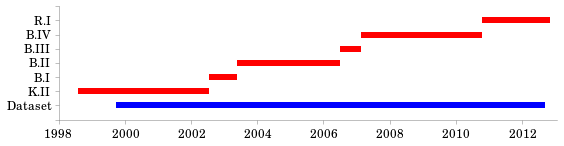

In [92]:
latexify(8,2.2)
plt.figure(1)
plt.hlines(y, start, end, colors=list(df.color), linewidth=6.0)
axes = plt.gca()
format_axes(axes)
axes.set_ylim([0,8])
axes.set_yticklabels(['']+list(df.name))
axes.set_xlim([0,5500])
axes.set_xticks(range(0, 5500, 365*2))
axes.set_xticklabels([str(x) for x in range(1998, 2014, 2)])
plt.tight_layout()
plt.savefig("/home/jvdzwaan/Dropbox/Publications/Papers/Dilipad/latex/images/data_timeline.pdf")